In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head

<bound method NDFrame.head of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_mal

In [6]:
## Check missing vakue
#df.isnull()
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
## Delete the rows or data point to handle missing values
df.shape

(891, 15)

In [8]:
df.dropna().shape

(182, 15)

Here we r lossing huge amount of data.

In [9]:
## Column wise deletion
df.dropna(axis=1)
# axis=1
# df.dropna(axis=1,inplace=True) # to make permennant operation. 

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


## Imputation Missing Values
1-Mean Value Imputation

In [16]:
sns.displot(df['age'])
# sns.histplot(df['age'])

In [20]:
df['Age_mean']=df['age'].fillna(df['age'].mean())
df[['Age_mean','age']]

,Age_mean,age
0,22.000000,22.0
1,38.000000,38.0
2,26.000000,26.0
3,35.000000,35.0
4,35.000000,35.0
...,...,...
886,27.000000,27.0
887,19.000000,19.0
888,29.699118,NaN
889,26.000000,26.0


In [ ]:
## Mean Imputation works well when we have normaly distributed data

# 2. MedianValue Imputation- If we have outliers in the dataset

In [22]:
df['Age_median']=df['age'].fillna(df['age'].median())
df[['Age_median','Age_mean','age']]

,Age_median,Age_mean,age
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,28.0,29.699118,NaN
889,26.0,26.000000,26.0


## 3. Mode Imputation Technique- Categorical Values

In [23]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_median,Age_mean
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [25]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [31]:
mode_value = df[df['embarked'].notna()]['embarked'].mode()[0]
mode_value

'S'

In [32]:
df['embarked_mode']=df['embarked'].fillna(mode_value)

In [34]:
df[['embarked_mode','embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [36]:
df['embarked'].isnull().sum()

2

In [37]:
df['embarked_mode'].isnull().sum()

0

## Handling Imbalanced Dataset
1. Up sampling
2. Down Sampling

In [40]:
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(123)

# Create a dataframe with two classes
n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples*class_0_ratio)
n_class_1 = n_samples - n_class_0 

In [41]:
n_class_0,n_class_1

(900, 100)

In [42]:
## Create my DataFrame with Imbalanced DataSet
class_0 = pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1] * n_class_1
})

In [43]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)
df.tail()

,feature_1,feature_2,target
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1
999,2.697490,2.013570,1


In [44]:
df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

In [45]:
## Upsampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [47]:
from sklearn.utils import resample
df_minority_upsampled=resample(df_minority,replace=True,#Sample with replacement
        n_samples=len(df_majority),
        random_state=42
        ) 

In [48]:
df_minority_upsampled.shape

(900, 3)

In [49]:
df_minority_upsampled.head()

,feature_1,feature_2,target
951,1.125854,1.843917,1
992,2.196570,1.397425,1
914,1.932170,2.998053,1
971,2.272825,3.034197,1
960,2.870056,1.550485,1


In [52]:
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled['target'].value_counts()

0    900
1    900
Name: target, dtype: int64

## Down Sampling

In [ ]:
## Dwon Sampling
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [60]:
from sklearn.utils import resample
df_majority_downsampled=resample(df_majority,replace=False,
        n_samples=len(df_minority),
        random_state=42
        ) 

In [61]:
df_majority_downsampled.shape

(100, 3)

In [62]:
df_downsampled=pd.concat([df_minority,df_majority_downsampled])
df_downsampled['target'].value_counts()

1    100
0    100
Name: target, dtype: int64

# Data augmentation is a technique of artificially increasing the training set by creating modified copies of a dataset using existing data. It includes making minor changes to the dataset or using deep learning to generate new data points.

## SMOTE(Synthetic Minority Oversampling Technique)

In [63]:
from sklearn.datasets import make_classification

In [69]:
#make_classification()
X,y=make_classification(n_samples=1000,n_redundant=0, n_features=2,n_clusters_per_class=1,
                   weights=[0.90],random_state=12)

In [70]:
import pandas as pd
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)
final_df.head()

,f1,f2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [106]:
final_df['target'].value_counts()

0    900
1    100
Name: target, dtype: int64

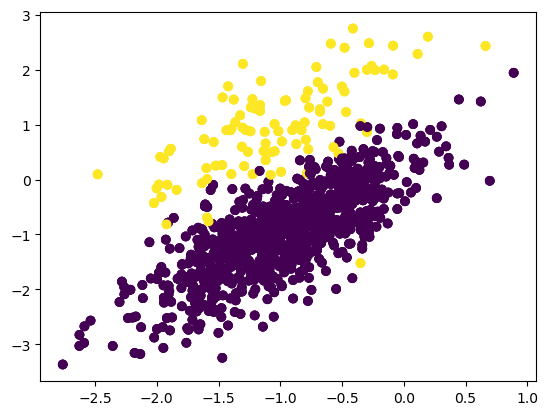

In [110]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])
plt.show()

In [82]:
!pip install imblearn

In [111]:
from imblearn.over_sampling import SMOTE

In [112]:
# Transform the dataset
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [113]:
x.shape

(1800, 2)

In [114]:
y.shape

(1800,)

In [115]:
len(y[y==0])

900

In [116]:
len(y[y==1])

900

In [117]:
df1=pd.DataFrame(X,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)

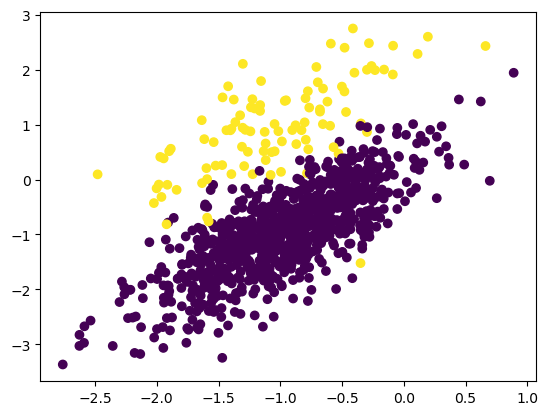

In [118]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])
plt.show()

# DATA INTERPOLATION
#   1. Linear Interpolation

In [119]:
import numpy as np

# Create some sample data
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

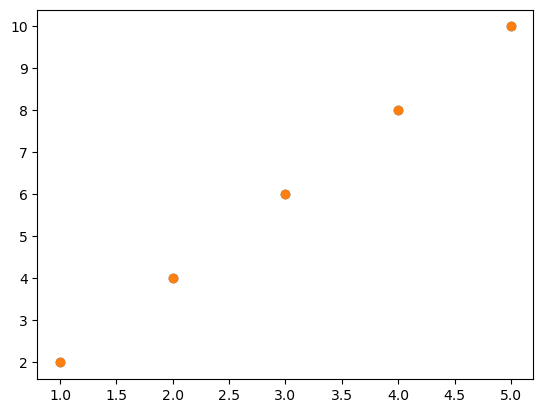

In [121]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [125]:
# There is only 5 points, now I want to add more points on same line.
## interplote the data using linear interpolation
x_new=np.linspace(1,5,10) ## create new x value within 1 & 5.
y_interp=np.interp(x_new,x,y)

In [126]:
y_interp

array([ 2.        ,  2.88888889,  3.77777778,  4.66666667,  5.55555556,
        6.44444444,  7.33333333,  8.22222222,  9.11111111, 10.        ])

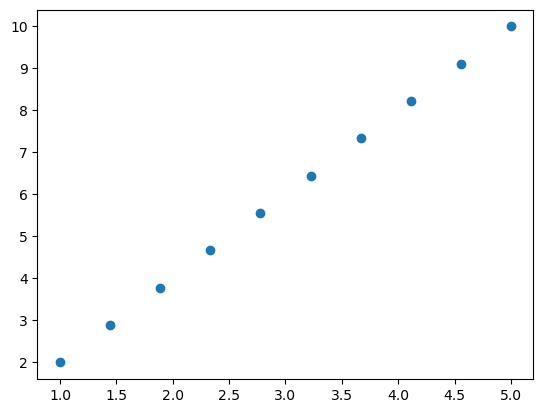

In [128]:
plt.scatter(x_new,y_interp)
plt.show()

# 2. Cubic Interpolation with Scipy

In [137]:
# Create some sample data
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [131]:
from scipy.interpolate import interp1d
# interp1d: create interpolation in 1-D.

In [132]:
## Create a cubic interpolation function
f=interp1d(x,y,kind='cubic')

In [133]:
# interpolate the data
x_new = np.linspace(1,5,10)
y_interp=f(x_new)

In [134]:
y_interp

array([  1.        ,   3.01371742,   6.739369  ,  12.7037037 ,
        21.43347051,  33.45541838,  49.2962963 ,  69.48285322,
        94.54183813, 125.        ])

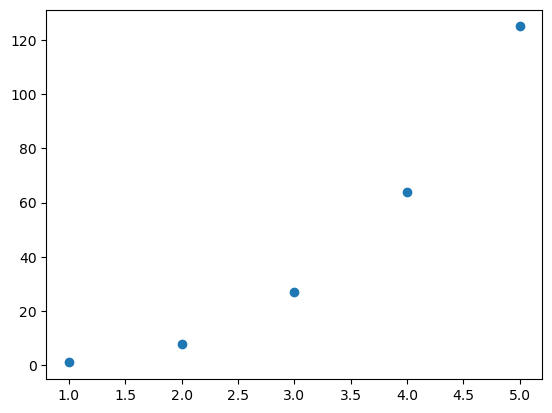

In [135]:
plt.scatter(x,y)
plt.show()

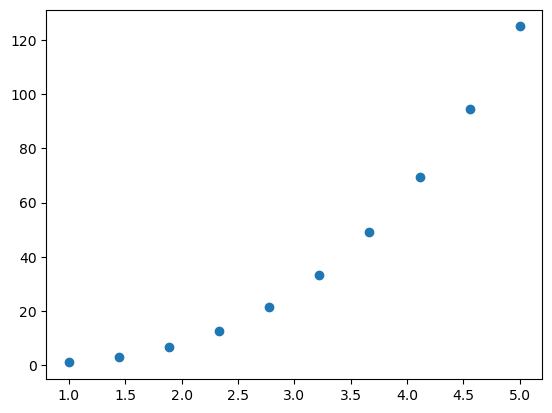

In [136]:
plt.scatter(x_new,y_interp)
plt.show()

# 3. Polynomial Interpolation

In [138]:
# Create some sample data
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [139]:
# Interpolate the data using polynomial interpolation
p=np.polyfit(x,y,2)

In [140]:
x_new = np.linspace(1,5,10) # Create new x values
y_interp=np.polyval(p, x_new) # interpolate y values

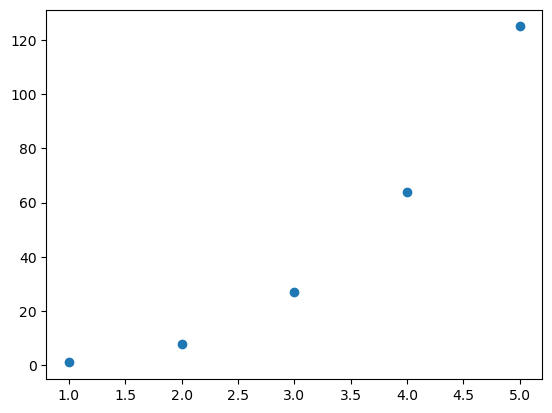

In [141]:
plt.scatter(x,y)
plt.show()

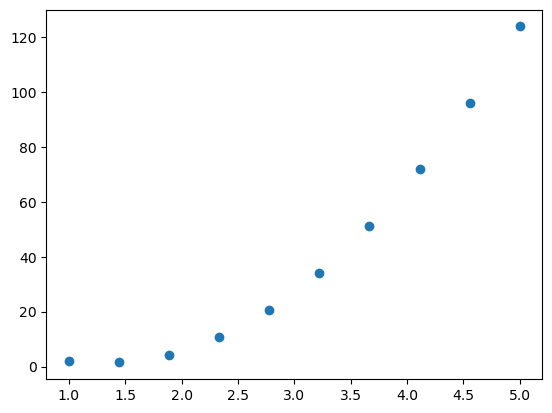

In [142]:
plt.scatter(x_new,y_interp)
plt.show()

In [ ]:
# Rest in notebook.

# 5 Number Summary and Box Plot

In [143]:
## Minimum, Maximum, Median,Q1,Q2,Q3,IQR

In [145]:
marks1=[45,32,56,75,89,54,32,89,90,97,67,54,45,98,99,67,74]
minimum,Q1,median,Q3,maximum=np.quantile(marks1,[0,0.25,0.50,0.75,1.0])
minimum,Q1,median,Q3,maximum

(32.0, 54.0, 67.0, 89.0, 99.0)

In [146]:
IQR=Q3-Q1
print(IQR)

35.0


In [150]:
lower_fence = Q1-1.5*(IQR)
lower_fence

1.5

In [151]:
higher_fence = Q3+1.5*(IQR)
higher_fence

141.5

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


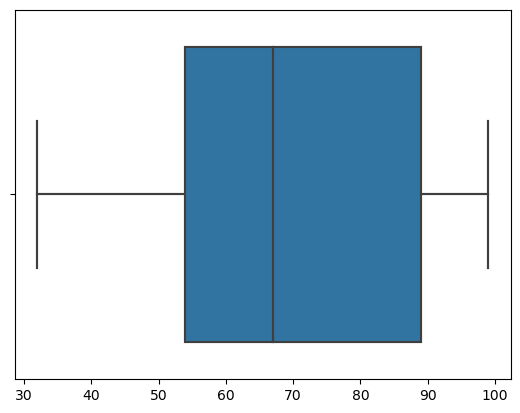

In [153]:
sns.boxplot(marks1)
plt.show()

In [154]:
marks1=[100,200,45,32,56,75,89,54,32,89,90,97,67,54,45,98,99,67,74,150,170,180]

C:\Users\rajee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


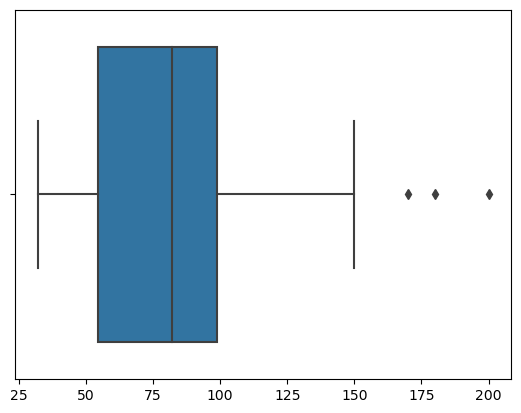

In [155]:
sns.boxplot(marks1)
plt.show()

# Feture Scaling

1. Standardization
2. Normalization: Min Max Scaler
3. Unit Vector

In [157]:
df=sns.load_dataset('tips')

In [158]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [162]:
mean=np.mean(df['total_bill'])
std=np.std(df['total_bill'])
print(mean,std)

19.785942622950824 8.88415057777113


In [164]:
normalized_data=[]
for i in list(df['total_bill']):
    z_score=(i-mean)/std
    normalized_data.append(z_score)

In [165]:
normalized_data

[-0.3147113050904947,
 -1.0632353132988699,
 0.13777989987156108,
 0.4383151031672544,
 0.5407447042905058,
 0.6195367051545452,
 -1.239954515236787,
 0.7985071071171492,
 -0.5342033074974618,
 -0.5634689078183908,
 -1.071114513385274,
 1.7417599174609364,
 -0.49143050702841173,
 -0.15262490331304188,
 -0.5578409077566736,
 0.20193910057513573,
 -1.0643609133112133,
 -0.39350330595453414,
 -0.31696250511518154,
 0.09725829942719756,
 -0.21003050394255615,
 0.056736698982834455,
 -0.45203450659639205,
 2.2100095225958003,
 0.003833498402693769,
 -0.22241210407833414,
 -0.7221785095588132,
 -0.7987193103981659,
 0.2154463007232569,
 -0.01530170180714459,
 -1.152157714274,
 -0.16162970341178906,
 -0.5319521074727749,
 0.10176069947657156,
 -0.22578890411536412,
 0.4810879036363043,
 -0.3912521059298474,
 -0.3214649051645551,
 -0.12335930299211276,
 1.2926455125359113,
 -0.4216433062631197,
 -0.26180810451035363,
 -0.6580193088552382,
 -1.1375249141135357,
 1.1947183114620337,
 -0.16838330

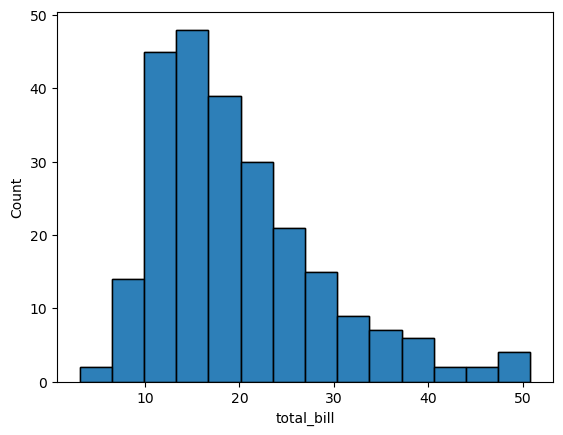

In [167]:
sns.histplot(df['total_bill'])
plt.show()

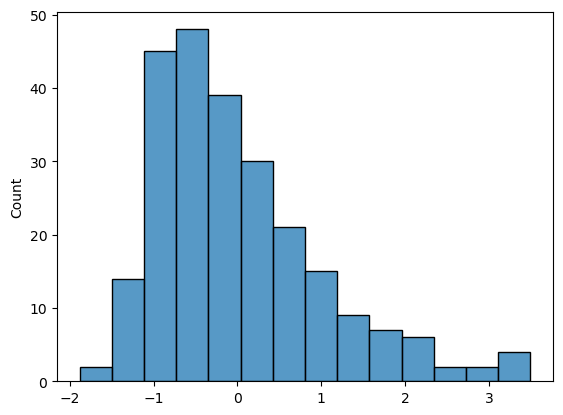

In [169]:
sns.histplot(normalized_data)
plt.show()

In [ ]:
# Better to use directly sklearn.Standrard Scaler

In [171]:
from sklearn.preprocessing import StandardScaler

In [179]:
scaler=StandardScaler
scaler

sklearn.preprocessing._data.StandardScaler

In [183]:
scaler.fit(df[['total_bill']])
# fit is try to compiute mean and std deviation for data

TypeError: fit() missing 1 required positional argument: 'X'

In [184]:
scaler.transform(df[['total_bill']])

TypeError: transform() missing 1 required positional argument: 'X'